In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
from pandas.plotting import scatter_matrix
from keras.losses import mse
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_atmes = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

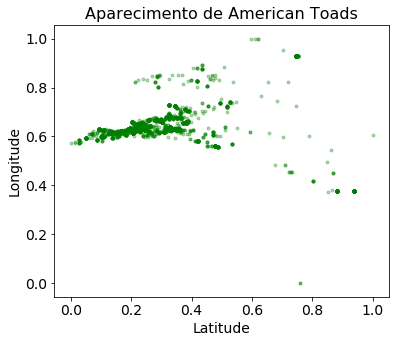

In [3]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.title("Aparecimento de American Toads")
plt.show()

# Autoencoder

In [4]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
input_dim = len(df_atmes.columns)
input_dim

28

In [6]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [7]:
# Cria o modelo para a rede anteriormente montada
autoencoder = Model(entrada,decoded)

In [8]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [10]:
batch = len(df_atmes)//10
batch

367

In [11]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [12]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/10000
2572/2572 [==============================] - 2s 967us/step - loss: 0.1397 - val_loss: 0.1308
Epoch 2/10000
2572/2572 [==============================] - 0s 15us/step - loss: 0.1332 - val_loss: 0.1256
Epoch 3/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.1279 - val_loss: 0.1209
Epoch 4/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.1231 - val_loss: 0.1167
Epoch 5/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.1186 - val_loss: 0.1130
Epoch 6/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.1149 - val_loss: 0.1094
Epoch 7/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.1114 - val_loss: 0.1059
Epoch 8/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1080 - val_loss: 0.1025
Epoch 9/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.1049 - val_loss: 0.09

2572/2572 [==============================] - 0s 16us/step - loss: 0.0086 - val_loss: 0.0074
Epoch 78/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0084 - val_loss: 0.0072
Epoch 79/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0083 - val_loss: 0.0071
Epoch 80/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0083 - val_loss: 0.0070
Epoch 81/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0081 - val_loss: 0.0069
Epoch 82/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0081 - val_loss: 0.0068
Epoch 83/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0079 - val_loss: 0.0068
Epoch 84/10000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.0067
Epoch 85/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0078 - val_loss: 0.0066
Epoch 86/10000
2572/2572 [==========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0049 - val_loss: 0.0038
Epoch 154/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0050 - val_loss: 0.0037
Epoch 155/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0037
Epoch 156/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0049 - val_loss: 0.0037
Epoch 157/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0049 - val_loss: 0.0037
Epoch 158/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 159/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 160/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 161/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 162/10000
2572/2572 [=================

Epoch 229/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0041 - val_loss: 0.0028
Epoch 230/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0028
Epoch 231/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0028
Epoch 232/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0028
Epoch 233/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0028
Epoch 234/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0027
Epoch 235/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0039 - val_loss: 0.0027
Epoch 236/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0038 - val_loss: 0.0027
Epoch 237/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0027
Epoch 238/10000
2572/2572 [=

Epoch 305/10000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0036 - val_loss: 0.0024
Epoch 306/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 307/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 308/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 309/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0033 - val_loss: 0.0023
Epoch 310/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 311/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 312/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0033 - val_loss: 0.0023
Epoch 313/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 314/10000
2572/2572 [=

2572/2572 [==============================] - 0s 18us/step - loss: 0.0032 - val_loss: 0.0022
Epoch 381/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 382/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0032 - val_loss: 0.0022
Epoch 383/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0032 - val_loss: 0.0022
Epoch 384/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 385/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0031 - val_loss: 0.0021
Epoch 386/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 387/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 388/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0031 - val_loss: 0.0021
Epoch 389/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 457/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 458/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 459/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 460/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 461/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 462/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 463/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 464/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 465/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 533/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 534/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 535/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 536/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 537/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 538/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 539/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 540/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 541/10000
2572/2572 [=================

Epoch 608/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 609/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 610/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 611/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 612/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 613/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 614/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0026 - val_loss: 0.0017
Epoch 615/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 616/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 617/10000
2572/2572 [=

Epoch 684/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 685/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 686/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 687/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 688/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 689/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 690/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 691/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 692/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 693/10000
2572/2572 [=

Epoch 760/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 761/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 762/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 763/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 764/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 765/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 766/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 767/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 768/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 769/10000
2572/2572 [=

Epoch 836/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0025 - val_loss: 0.0016
Epoch 837/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 838/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 839/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 840/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 841/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 842/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 843/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 844/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 845/10000
2572/2572 [=

Epoch 912/10000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 913/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 914/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 915/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 916/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 917/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 918/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 919/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 920/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 921/10000
2572/2572 [=

2572/2572 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0013
Epoch 988/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 989/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 990/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 991/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 992/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 993/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 994/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 995/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 996/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 1063/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 1064/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 1065/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 1066/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 1067/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 1068/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 1069/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 1070/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1071/10000
2572/2572 [========

2572/2572 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1138/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1139/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1140/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1141/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0023 - val_loss: 0.0013
Epoch 1142/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0024 - val_loss: 0.0013
Restoring model weights from the end of the best epoch
Epoch 01142: early stopping


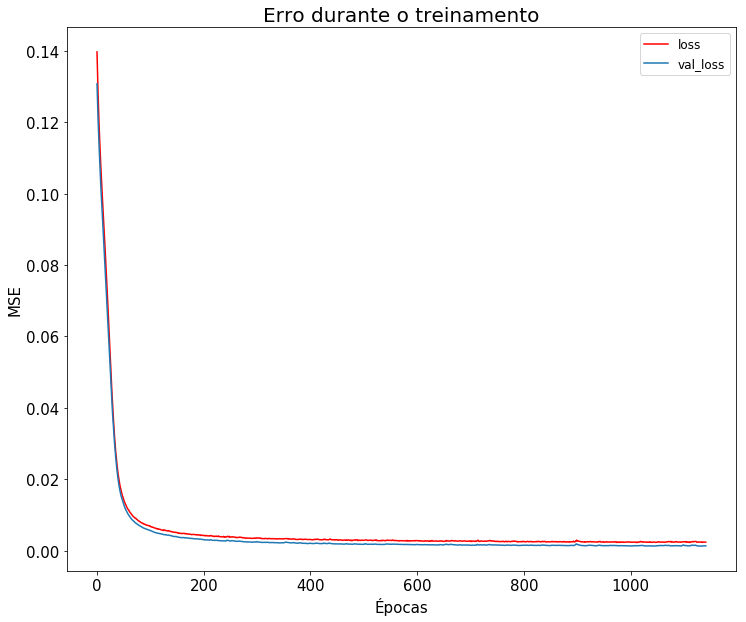

In [13]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [14]:
# Faz a previsão para a base de teste
testeAtMes = autoencoder.predict(X_testAtMes)

In [15]:
# Calcula o erro (MSE) para o teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)
#20% de dropout: 0.0016651906830162412
#30% de dropout: 0.12273836268258981

1103/1103 [==============================] - 0s 16us/step


0.0012661009138618476

In [16]:
# Calcula o erro (MSE) para o treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)
#20% de dropout: 0.0016855491797981457
#30% de dropout: 0.12279615244751399

2572/2572 [==============================] - 0s 7us/step


0.001300309094184688

# Feature Selection

## Métricas de Características da Base

In [17]:
def classifica_dict(d, reverso):
    feature = []
    valor = []
    for b in sorted(d, key = d.get,reverse=reverso):
        feature.append(b)
        valor.append(d[b])
    return feature, valor

In [18]:
def variation_ranking(data):
    var = {}
    for c in data.columns:
        var[c] = data[c].var()
    return classifica_dict(var,reverso=True)

In [19]:
def pearson_correlation_ranking(data):
    pc = {}
    for i in data.columns:
        soma = 0
        for j in data.columns.drop(i):
            soma = soma + np.abs(pearsonr(data[i],data[j])[0])
        pc[i] = soma
    return classifica_dict(pc,reverso=False)

In [20]:
def interquartile_ranking_ranking(data):
    ir = {}
    for c in data.columns:
        ir[c] = data[c].quantile(q=0.75) - data[c].quantile(q=0.25)
    return classifica_dict(ir,reverso=False)

In [36]:
def distancia_pontos(p1, p2):
    soma = 0
    for i in range(len(p1)):
        soma = soma + math.pow(p1[i]-p2[i],2)
    return math.sqrt(soma)

def centroid(data):
    cen = []
    qtd = len(data)
    for c in data.columns:
        cen.append(data[c].sum()/qtd)
    return cen

def intra_class_distance_ranking(data):
    icd = {}
    cent = centroid(data)
    sz = len(data)
    for c in data.columns:
        d = 0
        for i in range(sz):
            d = d + distancia_pontos(data.loc[i], cent)
        d = d/sz
        d1 = 0
        dados = data.drop(c,axis=1)
        for i in range(sz):
            d1 = d1 + distancia_pontos(dados.loc[i], cent)
        d1 = d1/sz
        icd[c] = d - d1
    return classifica_dict(icd,reverso=False)

In [37]:
intra_class_distance_ranking(df_atmes)

(['date',
  'lat',
  'lng',
  'snow',
  'thunder',
  'minhumidity',
  'coolingdegreedays',
  'maxdewptm',
  'heatingdegreedays',
  'meanpressurem',
  'minwspdm',
  'fog',
  'rain',
  'humidity',
  'gdegreedays',
  'mindewptm',
  'maxtempm',
  'minpressurem',
  'meanwindspdm',
  'maxpressurem',
  'hail',
  'meandewptm',
  'maxwspdm',
  'precipm',
  'meantempm',
  'meanwdird',
  'maxhumidity',
  'mintempm'],
 [-1.4669810515139352,
  -1.4612849199061044,
  -1.442669234106665,
  -1.361770198467353,
  -1.3539804069271286,
  -1.3168465270475667,
  -1.290568995312981,
  -1.2186815084156428,
  -1.1507231230496493,
  -1.1125997246617203,
  -1.0885783139177907,
  -1.0798315135491459,
  -1.053908327153986,
  -0.9983301251826877,
  -0.9582697180079245,
  -0.9198735154530151,
  -0.9160522612168562,
  -0.9160046975938161,
  -0.8628877325205648,
  -0.8069867997548441,
  -0.7349505057416068,
  -0.5680676524437103,
  -0.437854787680394,
  -0.4346296039124795,
  -0.19858372387596157,
  -0.08591654388678

In [90]:
interquartile_ranking_ranking(df_atmes)

(['hail',
  'coolingdegreedays',
  'thunder',
  'snow',
  'fog',
  'rain',
  'precipm',
  'lng',
  'maxwspdm',
  'meanwindspdm',
  'date',
  'maxtempm',
  'meantempm',
  'minwspdm',
  'mintempm',
  'lat',
  'maxdewptm',
  'heatingdegreedays',
  'maxpressurem',
  'mindewptm',
  'meanpressurem',
  'maxhumidity',
  'minpressurem',
  'meandewptm',
  'humidity',
  'minhumidity',
  'gdegreedays',
  'meanwdird'],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.031597279692543,
  0.05500000000000001,
  0.05714285714285715,
  0.09090909090909088,
  0.11764705882352944,
  0.12962962962962965,
  0.1313131313131313,
  0.13793103448275867,
  0.15135276256531535,
  0.1568627450980392,
  0.15789473684210528,
  0.16326530612244888,
  0.16666666666666674,
  0.17071147064924203,
  0.1842105263157895,
  0.19148936170212771,
  0.1923076923076923,
  0.25,
  0.27083333333333326,
  0.4,
  0.6481994459833795])

In [88]:
pearson_correlation_ranking(df_atmes)

(['hail',
  'lng',
  'fog',
  'precipm',
  'snow',
  'meanwdird',
  'lat',
  'thunder',
  'minwspdm',
  'rain',
  'maxwspdm',
  'meanwindspdm',
  'maxhumidity',
  'date',
  'minpressurem',
  'minhumidity',
  'meanpressurem',
  'coolingdegreedays',
  'maxpressurem',
  'humidity',
  'maxtempm',
  'heatingdegreedays',
  'gdegreedays',
  'meantempm',
  'mintempm',
  'mindewptm',
  'maxdewptm',
  'meandewptm'],
 [0.6119816351798741,
  1.5577078594403821,
  1.8301342016443631,
  2.140473136205351,
  2.1599021819655295,
  2.1989701461809057,
  2.2164129207534264,
  3.3965556664290553,
  3.4397701808316645,
  3.693647789625946,
  3.977341398808227,
  4.4725737914841215,
  4.6565378168583385,
  5.16917692765491,
  5.316788965705989,
  5.686401402188079,
  5.745953622625391,
  5.7720105837317055,
  5.799857392159813,
  5.978440230888547,
  8.028964913257285,
  8.447637369960512,
  8.486169796488802,
  8.868732248850245,
  9.073028105268849,
  9.89977106511759,
  10.167137363087956,
  10.39384696

In [84]:
variation_ranking(df_atmes)

(['rain',
  'meanwdird',
  'gdegreedays',
  'fog',
  'thunder',
  'minhumidity',
  'humidity',
  'lat',
  'coolingdegreedays',
  'maxhumidity',
  'minpressurem',
  'date',
  'meanpressurem',
  'maxpressurem',
  'meandewptm',
  'minwspdm',
  'maxdewptm',
  'mindewptm',
  'heatingdegreedays',
  'meantempm',
  'mintempm',
  'maxtempm',
  'lng',
  'snow',
  'maxwspdm',
  'meanwindspdm',
  'hail',
  'precipm'],
 [0.16376049385459135,
  0.10234661191715536,
  0.05058567724646878,
  0.05025940697454813,
  0.043883587185554684,
  0.036248174939706494,
  0.030789965626364258,
  0.02969112904431288,
  0.0238245190509519,
  0.021874730385461196,
  0.01904523098151621,
  0.017011784554291035,
  0.016573428925570937,
  0.015130467425857604,
  0.014238447499288452,
  0.013870001875981256,
  0.013826595816348394,
  0.0125288857144503,
  0.011157178214711351,
  0.009944241034309577,
  0.009550619321076705,
  0.00823994966714471,
  0.00722849281429591,
  0.0052113583593480966,
  0.0024486055477018795,


## Agregação de Rankings

In [81]:
# Rankeia através da média das posições de cada feature
# Podemos colocar pesos nos rankings e fazer uma média ponderada
def mean_agreggation(ranks, colunas):
    medias = {}
    for c in colunas:
        medias[c] = 0.0
    for r in ranks:
        i = 1
        for p in r[0]:
            medias[p] = medias[p] + i
            i = i + 1
    s = len(ranks)
    for c in colunas:
        medias[c] = medias[c]/s
    return classifica_dict(medias,reverso=True)

In [90]:
ranks = []
aval = df_atmes.drop('date',axis=1)
aval = aval.drop('lat',axis=1)
aval = aval.drop('lng',axis=1)
ranks.append(variation_ranking(aval))
ranks.append(pearson_correlation_ranking(aval))
ranks.append(interquartile_ranking_ranking(aval))
ranks.append(intra_class_distance_ranking(aval))

In [91]:
mean_f, mean_v = mean_agreggation(ranks,aval.columns)
mean_v

[19.75,
 19.5,
 18.0,
 17.25,
 15.75,
 15.5,
 15.25,
 14.75,
 14.75,
 14.5,
 14.5,
 14.5,
 14.25,
 14.25,
 13.75,
 13.5,
 13.25,
 11.5,
 11.0,
 10.0,
 7.25,
 6.75,
 6.25,
 5.0,
 4.25]

In [101]:
a[20:]

hail           0.000000
meandewptm     0.576923
maxwspdm       0.120000
precipm        0.000000
meantempm      0.666667
meanwdird      0.000000
maxhumidity    0.802632
mintempm       0.672414
Name: 1555, dtype: float64

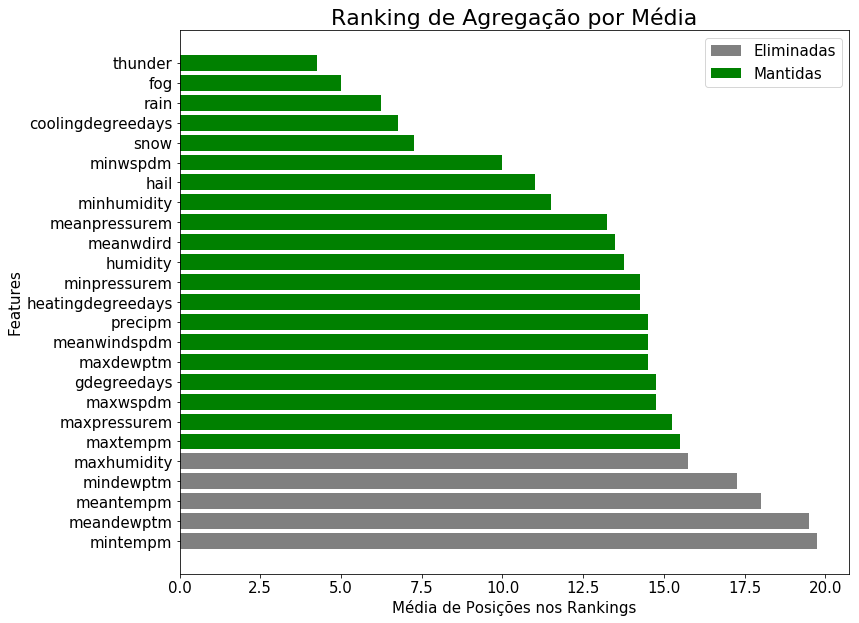

In [106]:
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.title(u"Ranking de Agregação por Média")
plt.xlabel(u"Média de Posições nos Rankings")
plt.ylabel("Features")
#plt.plot([0,np.max(values)],[len(bads),len(bads)],c='r',linewidth=3)
plt.barh(mean_f[:5],mean_v[:5],color='grey',label='Eliminadas')
plt.barh(mean_f[5:],mean_v[5:],color='green',label='Mantidas')
plt.legend()
plt.show()

In [112]:
for e in mean_f[:5]:
    df_atmes.drop(e,axis=1,inplace=True)

## Análise de Reconstrução

In [108]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true))

In [109]:
# Calcula o erro (MSE) para o treino
scores = mean_squared_error(X_testAtMes, testeAtMes)
# Transforma em dict
score = {}
for c in scores.keys():
    score[c] = scores[c]
score

{'coolingdegreedays': 0.0016667897230012968,
 'date': 0.001796369828492825,
 'fog': 0.0001042240179106528,
 'gdegreedays': 0.0024366761498545624,
 'hail': 2.6816062487900886e-05,
 'heatingdegreedays': 0.0008624776243079932,
 'humidity': 0.0023244983386589294,
 'lat': 0.0013236755545484701,
 'lng': 0.002814700791119859,
 'maxdewptm': 0.001052945244720678,
 'maxhumidity': 0.0021372182116644774,
 'maxpressurem': 0.0015770812837213244,
 'maxtempm': 0.000816473911054998,
 'maxwspdm': 0.000963698170095953,
 'meandewptm': 0.0006229970812509401,
 'meanpressurem': 0.00092346282060141,
 'meantempm': 0.0003228590434551034,
 'meanwdird': 0.002943662676448572,
 'meanwindspdm': 0.000793316936286287,
 'mindewptm': 0.0009168742500102698,
 'minhumidity': 0.0021552729909714197,
 'minpressurem': 0.0017843175116639138,
 'mintempm': 0.0010837116492990223,
 'minwspdm': 0.0031077348996092144,
 'precipm': 0.00055950852200979,
 'rain': 0.00018197070634688254,
 'snow': 7.4424523097051e-05,
 'thunder': 7.7065647

('minwspdm', 0.0031077348996092144)


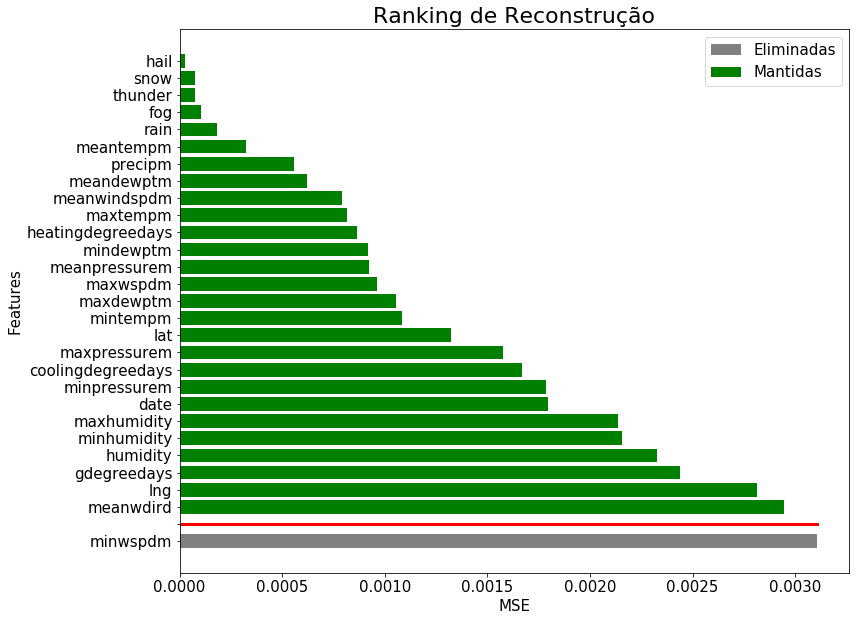

In [110]:
bads = []
values = []
rank = []
rankv = []
# Ranqueia
for b in sorted(score, key = score.get,reverse=True):
    rank.append(b)
    rankv.append(score[b])
    
# Separa as ruins
for a in sorted(score, key = score.get,reverse=True):
    if(score[a] > 0.003):
        print(a,score[a])
        bads.append(a)
        values.append(score[a])
        rank.remove(a)
        rankv.remove(score[a])

# Plota gráfico de barras horizontais
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.title(u"Ranking de Reconstrução")
plt.xlabel("MSE")
plt.ylabel("Features")
plt.plot([0,np.max(values)],[len(bads),len(bads)],c='r',linewidth=3)
bads.append('')
values.append(0)
plt.barh(bads,values,color='grey',label='Eliminadas')
plt.barh(rank,rankv,color='green',label='Mantidas')
plt.legend()
plt.show()

In [22]:
bads.remove('')
bads.remove('lng')
for b in bads:
    df_atmes.drop(b,axis=1,inplace=True)
df_atmes.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,maxtempm,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,mintempm
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,0.424391,0.313392,0.639710,0.046453,0.005220,0.417656,0.068422,0.625303,0.101475,0.478729,...,0.511441,0.080880,0.491284,0.001203,0.690873,0.102965,0.007375,0.717266,0.384928,0.721173
std,0.130429,0.172311,0.085021,0.207810,0.071755,0.188882,0.151484,0.116721,0.104713,0.126506,...,0.089104,0.047088,0.118210,0.033156,0.119145,0.049627,0.031161,0.099060,0.318295,0.097727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363636,0.207383,0.620315,0.000000,0.000000,0.270833,0.000000,0.549020,0.000000,0.398776,...,0.455882,0.047619,0.408163,0.000000,0.596154,0.075000,0.000000,0.648148,0.000000,0.655172
50%,0.363636,0.301612,0.627941,0.000000,0.000000,0.406250,0.000000,0.647059,0.078947,0.484754,...,0.514706,0.076190,0.489796,0.000000,0.711538,0.100000,0.000000,0.722222,0.401662,0.724138
75%,0.454545,0.358735,0.651912,0.000000,0.000000,0.541667,0.000000,0.705882,0.157895,0.564095,...,0.573529,0.104762,0.571429,0.000000,0.788462,0.130000,0.000000,0.777778,0.645429,0.793103
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_atmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 26 columns):
date                 3675 non-null float64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
heatingdegreedays    3675 non-null float64
meanpressurem        3675 non-null float64
rain                 3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null float64
minpressurem         3675 non-null float64
maxtempm             3675 non-null float64
meanwindspdm         3675 non-null float64
maxpressurem         3675 non-null float64
hail                 3675 non-null float64
meandewptm           3675 non-nul

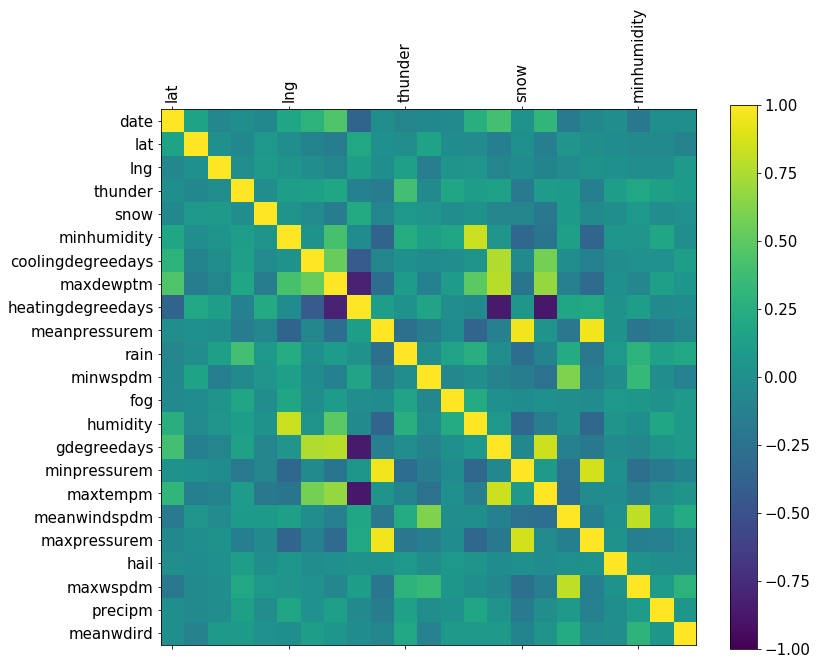

In [135]:
# Plota matriz de correlação
# Quanto mais correlacionadas duas features, mais forte é a cor de interseção entre elas
# crescem justas na mesma direção = bem correlacionadas
# crescem em direções opostas = mal correlacionadas
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
correlations = df_atmes.corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,input_dim,1)
ax.set_yticks(ticks)
ax.set_xticklabels(df_atmes.columns,rotation=90)
ax.set_yticklabels(df_atmes.columns)
plt.show()

## Treinamento de Rede Final com as features selecionadas

In [124]:
input_dim = len(df_atmes.columns)
input_dim

23

In [125]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.2)(encoded1)
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [126]:
# Cria o modelo para a rede anteriormente montada
final_autoencoder = Model(entrada,decoded)

In [127]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
final_autoencoder.compile(optimizer='adam', loss='mse')

In [128]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [129]:
batch = len(df_atmes)//10
batch
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [130]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500, restore_best_weights=True)
history = final_autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 1s 364us/step - loss: 0.1541 - val_loss: 0.1418
Epoch 2/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1483 - val_loss: 0.1369
Epoch 3/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.1438 - val_loss: 0.1335
Epoch 4/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.1392 - val_loss: 0.1296
Epoch 5/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1351 - val_loss: 0.1257
Epoch 6/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.1311 - val_loss: 0.1222
Epoch 7/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.1274 - val_loss: 0.1187
Epoch 8/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1239 - val_loss: 0.1157
Epoch 9/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.1207 - val_loss: 0.1124
Epoch 

2572/2572 [==============================] - 0s 17us/step - loss: 0.0139 - val_loss: 0.0114
Epoch 78/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0136 - val_loss: 0.0112
Epoch 79/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0135 - val_loss: 0.0111
Epoch 80/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0134 - val_loss: 0.0110
Epoch 81/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0132 - val_loss: 0.0108
Epoch 82/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0130 - val_loss: 0.0107
Epoch 83/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0128 - val_loss: 0.0105
Epoch 84/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0128 - val_loss: 0.0104
Epoch 85/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0126 - val_loss: 0.0102
Epoch 86/3000
2572/2572 [==============================] - 0

Epoch 154/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0059
Epoch 155/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0082 - val_loss: 0.0059
Epoch 156/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0082 - val_loss: 0.0059
Epoch 157/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0082 - val_loss: 0.0058
Epoch 158/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0081 - val_loss: 0.0058
Epoch 159/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0082 - val_loss: 0.0058
Epoch 160/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0058
Epoch 161/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0080 - val_loss: 0.0058
Epoch 162/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0081 - val_loss: 0.0057
Epoch 163/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 23us/step - loss: 0.0067 - val_loss: 0.0042
Epoch 231/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0067 - val_loss: 0.0042
Epoch 232/3000
2572/2572 [==============================] - 0s 30us/step - loss: 0.0067 - val_loss: 0.0042
Epoch 233/3000
2572/2572 [==============================] - 0s 39us/step - loss: 0.0066 - val_loss: 0.0042
Epoch 234/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0066 - val_loss: 0.0041
Epoch 235/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0067 - val_loss: 0.0041
Epoch 236/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0065 - val_loss: 0.0041
Epoch 237/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0066 - val_loss: 0.0041
Epoch 238/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0065 - val_loss: 0.0041
Epoch 239/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0059 - val_loss: 0.0036
Epoch 307/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0060 - val_loss: 0.0036
Epoch 308/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0059 - val_loss: 0.0036
Epoch 309/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0059 - val_loss: 0.0036
Epoch 310/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0060 - val_loss: 0.0036
Epoch 311/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0059 - val_loss: 0.0036
Epoch 312/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0058 - val_loss: 0.0036
Epoch 313/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0059 - val_loss: 0.0036
Epoch 314/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0058 - val_loss: 0.0036
Epoch 315/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 24us/step - loss: 0.0055 - val_loss: 0.0032
Epoch 383/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0057 - val_loss: 0.0032
Epoch 384/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0056 - val_loss: 0.0032
Epoch 385/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0057 - val_loss: 0.0033
Epoch 386/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0055 - val_loss: 0.0032
Epoch 387/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0056 - val_loss: 0.0032
Epoch 388/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0055 - val_loss: 0.0032
Epoch 389/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0054 - val_loss: 0.0032
Epoch 390/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0055 - val_loss: 0.0031
Epoch 391/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0054 - val_loss: 0.0029
Epoch 459/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0052 - val_loss: 0.0029
Epoch 460/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0053 - val_loss: 0.0029
Epoch 461/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0053 - val_loss: 0.0029
Epoch 462/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0053 - val_loss: 0.0029
Epoch 463/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0053 - val_loss: 0.0029
Epoch 464/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0054 - val_loss: 0.0029
Epoch 465/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0053 - val_loss: 0.0029
Epoch 466/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0054 - val_loss: 0.0029
Epoch 467/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0026
Epoch 535/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 536/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0026
Epoch 537/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 538/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 539/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0050 - val_loss: 0.0026
Epoch 540/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 541/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 542/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0050 - val_loss: 0.0026
Epoch 543/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 611/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 612/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0049 - val_loss: 0.0024
Epoch 613/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 614/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 615/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0047 - val_loss: 0.0025
Epoch 616/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 617/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0048 - val_loss: 0.0025
Epoch 618/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 619/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 687/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0047 - val_loss: 0.0024
Epoch 688/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 689/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 690/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0049 - val_loss: 0.0024
Epoch 691/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0047 - val_loss: 0.0024
Epoch 692/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0023
Epoch 693/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0023
Epoch 694/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0048 - val_loss: 0.0023
Epoch 695/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0023
Epoch 763/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0049 - val_loss: 0.0023
Epoch 764/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0047 - val_loss: 0.0025
Epoch 765/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0048 - val_loss: 0.0025
Epoch 766/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0025
Epoch 767/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0048 - val_loss: 0.0024
Epoch 768/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0024
Epoch 769/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0048 - val_loss: 0.0023
Epoch 770/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0048 - val_loss: 0.0023
Epoch 771/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0023
Epoch 839/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0023
Epoch 840/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0048 - val_loss: 0.0022
Epoch 841/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0022
Epoch 842/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 843/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 844/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0023
Epoch 845/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0024
Epoch 846/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0024
Epoch 847/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 915/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0043 - val_loss: 0.0022
Epoch 916/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 917/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 918/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 919/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0047 - val_loss: 0.0022
Epoch 920/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 921/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0047 - val_loss: 0.0023
Epoch 922/3000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 923/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 991/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 992/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 993/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0045 - val_loss: 0.0023
Epoch 994/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 995/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 996/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 997/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 998/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0046 - val_loss: 0.0023
Epoch 999/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 1067/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0046 - val_loss: 0.0022
Epoch 1068/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1069/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0047 - val_loss: 0.0021
Epoch 1070/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0021
Epoch 1071/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1072/3000
2572/2572 [==============================] - 0s 30us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1073/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1074/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1075/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 1143/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1144/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1145/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0046 - val_loss: 0.0021
Epoch 1146/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1147/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0046 - val_loss: 0.0021
Epoch 1148/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1149/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1150/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1151/3000
2572/2572 [=================

Epoch 1218/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1219/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1220/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1221/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1222/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0046 - val_loss: 0.0021
Epoch 1223/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1224/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1225/3000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1226/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1227/3000
2572/2572 [=

2572/2572 [==============================] - 0s 39us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 1294/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1295/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1296/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1297/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1298/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1299/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1300/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1301/3000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1302/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0022
Epoch 1370/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1371/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1372/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1373/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1374/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1375/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1376/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1377/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1378/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1446/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1447/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1448/3000
2572/2572 [==============================] - 0s 34us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1449/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0020
Epoch 1450/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1451/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1452/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1453/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0044 - val_loss: 0.0020
Epoch 1454/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 22us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1522/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 1523/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1524/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1525/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0045 - val_loss: 0.0021
Epoch 1526/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1527/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1528/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0045 - val_loss: 0.0022
Epoch 1529/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 1530/3000
2572/2572 [=================

Epoch 1597/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1598/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 1599/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1600/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1601/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1602/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1603/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1604/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1605/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1606/3000
2572/2572 [=

Epoch 1673/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1674/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1675/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1676/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1677/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1678/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1679/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1680/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1681/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1682/3000
2572/2572 [=

Epoch 1749/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1750/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1751/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1752/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1753/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1754/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1755/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1756/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 1757/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0019
Epoch 1758/3000
2572/2572 [=

Epoch 1825/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1826/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1827/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1828/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1829/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 1830/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1831/3000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1832/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 1833/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1834/3000
2572/2572 [=

Epoch 1901/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0043 - val_loss: 0.0019
Epoch 1902/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1903/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1904/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 1905/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 1906/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 1907/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 1908/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 1909/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 1910/3000
2572/2572 [=

Epoch 1977/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 1978/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1979/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1980/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1981/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1982/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1983/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1984/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0043 - val_loss: 0.0021
Epoch 1985/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 1986/3000
2572/2572 [=

Epoch 2053/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 2054/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2055/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2056/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2057/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2058/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2059/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2060/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2061/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2062/3000
2572/2572 [=

Epoch 2129/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2130/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2131/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2132/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2133/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2134/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2135/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2136/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 2137/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2138/3000
2572/2572 [=

2572/2572 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2205/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2206/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0020
Epoch 2207/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 2208/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 2209/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2210/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0021
Epoch 2211/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 2212/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2213/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2281/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2282/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2283/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0019
Epoch 2284/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2285/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2286/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2287/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2288/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2289/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2357/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2358/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2359/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2360/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2361/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2362/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 2363/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2364/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2365/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2433/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2434/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2435/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0043 - val_loss: 0.0019
Epoch 2436/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2437/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2438/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2439/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2440/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2441/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2509/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0018
Epoch 2510/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0043 - val_loss: 0.0018
Epoch 2511/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2512/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2513/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2514/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2515/3000
2572/2572 [==============================] - ETA: 0s - loss: 0.003 - 0s 19us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2516/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2517/3000
2572

Epoch 2584/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0043 - val_loss: 0.0018
Epoch 2585/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0019
Epoch 2586/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2587/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2588/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2589/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2590/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2591/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2592/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2593/3000
2572/2572 [=

2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2660/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2661/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2662/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2663/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 2664/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 2665/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2666/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2667/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2668/3000
2572/2572 [=================

Epoch 2735/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0044 - val_loss: 0.0019
Epoch 2736/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2737/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2738/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2739/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2740/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2741/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 2742/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2743/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2744/3000
2572/2572 [=

Epoch 2811/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2812/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2813/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2814/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 2815/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2816/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 2817/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2818/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2819/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2820/3000
2572/2572 [=

Epoch 2887/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2888/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 2889/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2890/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2891/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2892/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0020
Epoch 2893/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0043 - val_loss: 0.0019
Epoch 2894/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2895/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2896/3000
2572/2572 [=

Epoch 2963/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2964/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 2965/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 2966/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2967/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2968/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2969/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2970/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0018
Epoch 2971/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 2972/3000
2572/2572 [=

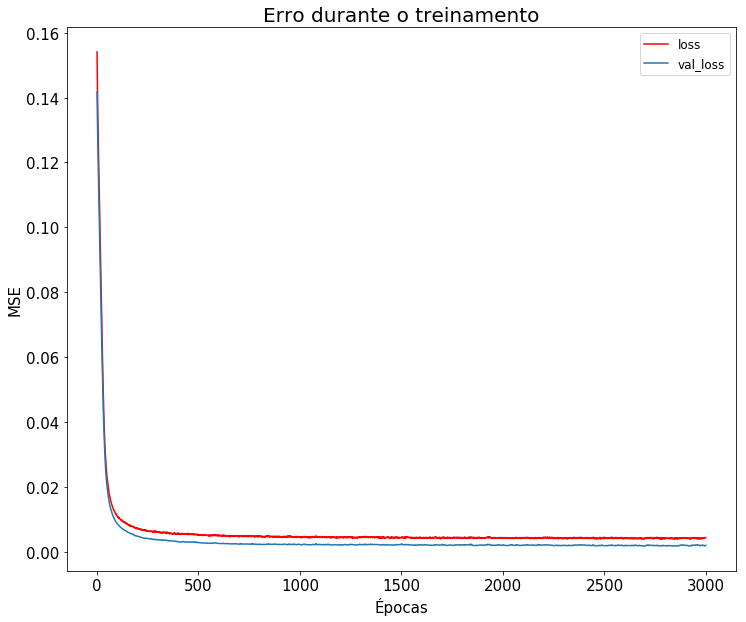

In [131]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [132]:
# Faz a previsão para a base de teste
testeAtMes = final_autoencoder.predict(X_testAtMes)

In [133]:
# Calcula o erro (MSE) para o teste
final_autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 20us/step


0.0019366076178738978

In [134]:
# Calcula o erro (MSE) para o treino
final_autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 6us/step


0.0019551975495785963

# Variational Autoencoder